<a href="https://colab.research.google.com/github/Lakshman3556/Machine_Learning/blob/main/PCA_LDA_LR_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/ML/titanic_train.csv")

# Take only numeric columns for PCA
X = data.select_dtypes(include=[np.number]).dropna(axis=0)   # remove missing values
print(X.head())


   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500


In [2]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# (a) Why standardize?

#PCA is based on variance.

#Features like Fare (up to hundreds) and Age (mostly below 100) are on very different scales.

#If we don’t standardize, larger-scaled variables dominate PCA.

#StandardScaler rescales all features → mean = 0, std = 18


In [3]:
pca = PCA(n_components=2)   # first 2 components
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.27038155 0.23918423]


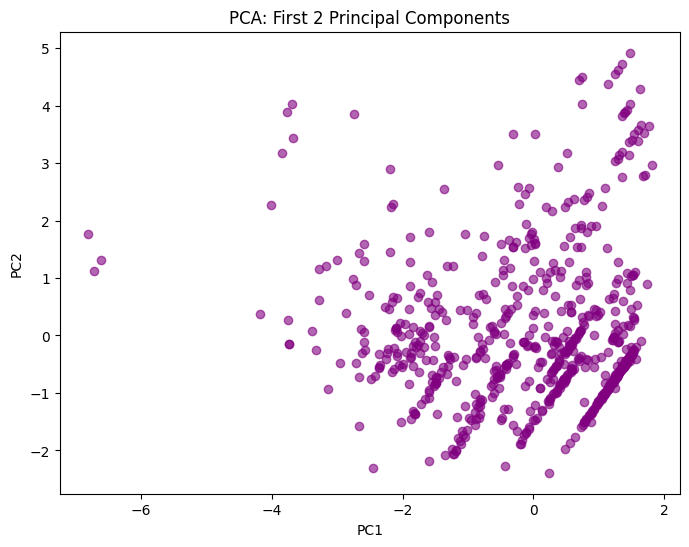

In [4]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6, c='purple')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First 2 Principal Components")
plt.show()


In [5]:
# Get loadings (contribution of each variable to PCs)
loadings = pd.DataFrame(pca.components_.T,
                        columns=['PC1','PC2'],
                        index=X.columns)
print(loadings)


                  PC1       PC2
PassengerId -0.060374 -0.104075
Survived    -0.413663  0.153419
Pclass       0.642413  0.086308
Age         -0.293228 -0.474311
SibSp        0.044501  0.602362
Parch       -0.072563  0.568386
Fare        -0.565080  0.217506


In [6]:
explained_var = pca.explained_variance_ratio_
print(f"PC1 explains {explained_var[0]*100:.2f}% of variance")
print(f"PC2 explains {explained_var[1]*100:.2f}% of variance")
print(f"Together PC1+PC2 explain {(explained_var[0]+explained_var[1])*100:.2f}% of variance")


PC1 explains 27.04% of variance
PC2 explains 23.92% of variance
Together PC1+PC2 explain 50.96% of variance


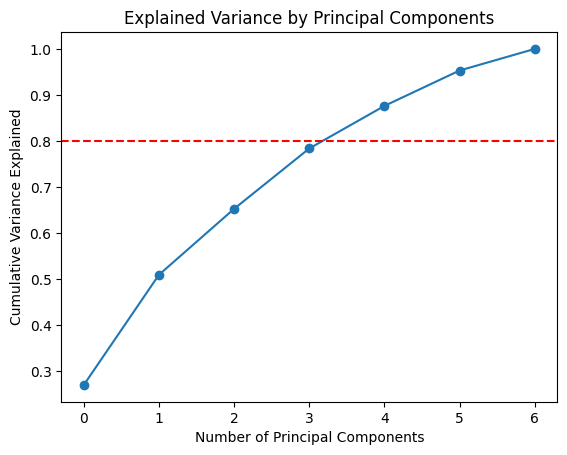

Number of PCs needed for >=80% variance: 5


In [7]:
pca_full = PCA().fit(X_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Explained Variance by Principal Components")
plt.show()

pcs_needed = np.argmax(cumulative_variance >= 0.8) + 1
print(f"Number of PCs needed for >=80% variance: {pcs_needed}")


In [ ]:
###LDA


LDA Explained Variance Ratio:
[1.]


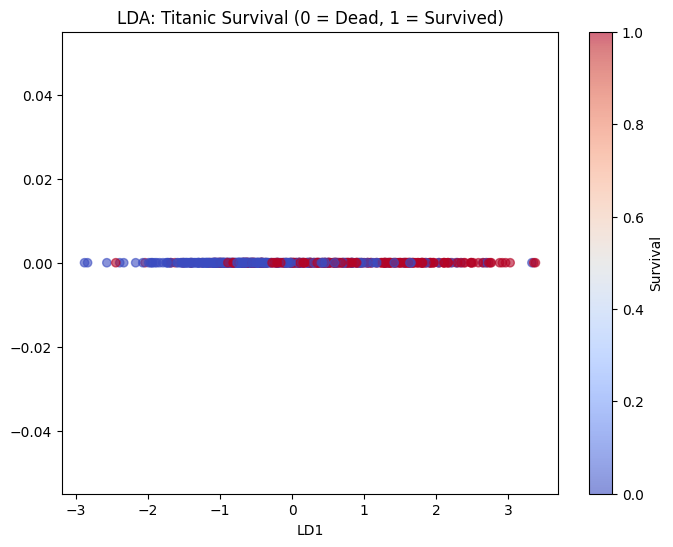

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Load Titanic dataset
data = pd.read_csv("/content/drive/MyDrive/ML/titanic_train.csv")

# Select numeric features + drop missing values for simplicity
X = data.select_dtypes(include=[np.number]).dropna()
y = X["Survived"]  # Target variable (binary: 0=Dead, 1=Survived)
X = X.drop("Survived", axis=1)

# Step 1: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply LDA (we can only extract 1 component since binary classification)
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Step 3: Explained variance ratio
print("\nLDA Explained Variance Ratio:")
print(lda.explained_variance_ratio_)

# Step 4: Scatter plot (LD1)
plt.figure(figsize=(8,6))
plt.scatter(X_lda, np.zeros_like(X_lda),
            c=y, cmap="coolwarm", alpha=0.6)

plt.xlabel("LD1")
plt.title("LDA: Titanic Survival (0 = Dead, 1 = Survived)")
plt.colorbar(label="Survival")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Intercept (β₀): 18569.02585648722
Slope (β₁): 107.1303589658252
Interpretation: For every 1 unit increase in Area, the house price increases by 107.13 units.


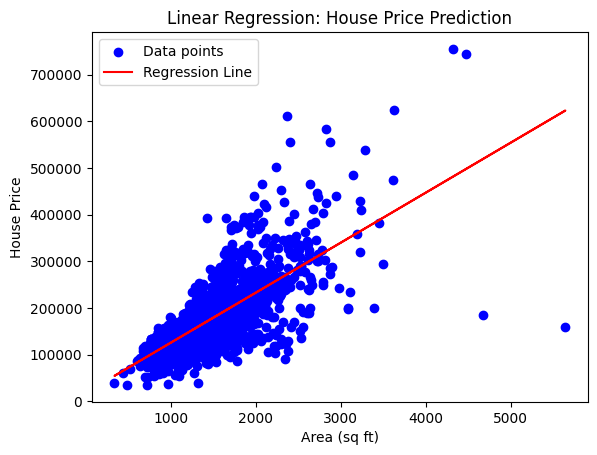

In [10]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Step 2: Load dataset from Google Drive
# Replace with your actual file path after mounting drive
from google.colab import drive
drive.mount('/content/drive')

# Example: if your dataset is in MyDrive
data = pd.read_csv('/content/drive/MyDrive/ML/house_price_train.csv')

# Step 3: Select independent (X) and dependent (y) variables
# Suppose 'Area' is the feature and 'Price' is the target
X = data[['GrLivArea']]  # Feature (independent variable)
y = data['SalePrice']    # Target (dependent variable)

# Step 4: Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 5: Get intercept and slope
intercept = model.intercept_
slope = model.coef_[0]

print("Intercept (β₀):", intercept)
print("Slope (β₁):", slope)
print(f"Interpretation: For every 1 unit increase in Area, the house price increases by {slope:.2f} units.")

# Step 6: Plot regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Area (sq ft)')
plt.ylabel('House Price')
plt.title('Linear Regression: House Price Prediction')
plt.legend()
plt.show()
